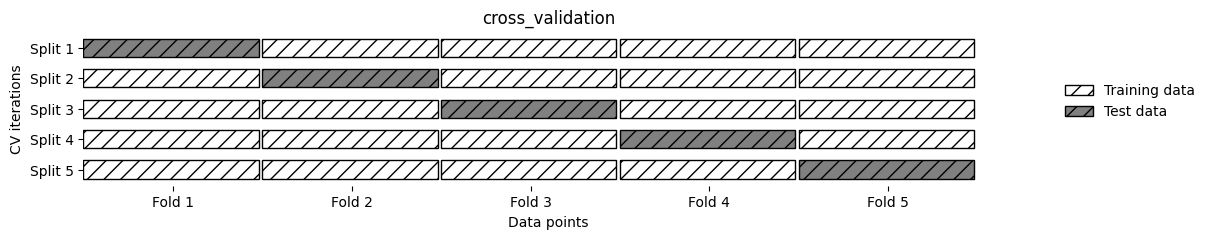

In [1]:
import mglearn
import pandas as pd

mglearn.plots.plot_cross_validation()

#### Перекрестная проверка в scikit-learn 

In [22]:
from sklearn.model_selection import cross_val_score 
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression

digits = load_digits()
logreg = LogisticRegression(max_iter=10000)

scores = cross_val_score(logreg,digits.data,digits.target)
print(format(scores))

[0.925      0.87777778 0.93871866 0.93314763 0.89693593]


In [24]:
scores = cross_val_score(logreg,digits.data,digits.target,cv=5)
print("Cross validation scores: {}".format(scores))

Cross validation scores: [0.925      0.87777778 0.93871866 0.93314763 0.89693593]


In [25]:
print("Средняя правильность перектрестной проверки: {}".format(scores.mean()))

Средняя правильность перектрестной проверки: 0.9143160012380068


In [26]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg,digits.data,digits.target,cv=5,return_train_score=True)
display(res)

{'fit_time': array([3.24675107, 2.47096705, 2.61856484, 3.67037439, 4.90511918]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.925     , 0.87777778, 0.93871866, 0.93314763, 0.89693593]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [28]:
import pandas as pd
res_df = pd.DataFrame(res)
display(res_df)
print("Mean time and scores:\n",res_df.mean())

,fit_time,score_time,test_score,train_score
0,3.246751,0.0,0.925000,1.0
1,2.470967,0.0,0.877778,1.0
2,2.618565,0.0,0.938719,1.0
3,3.670374,0.0,0.933148,1.0
4,4.905119,0.0,0.896936,1.0


Mean time and scores:
 fit_time       3.382355
score_time     0.000000
test_score     0.914316
train_score    1.000000
dtype: float64


#### Стратифицированная k-блочная перекрестная проверка 

In [29]:
from sklearn.datasets import load_digits
digits = load_digits()
print("Метки дижитов {}".format(digits.target))

Метки дижитов [0 1 2 ... 8 9 8]


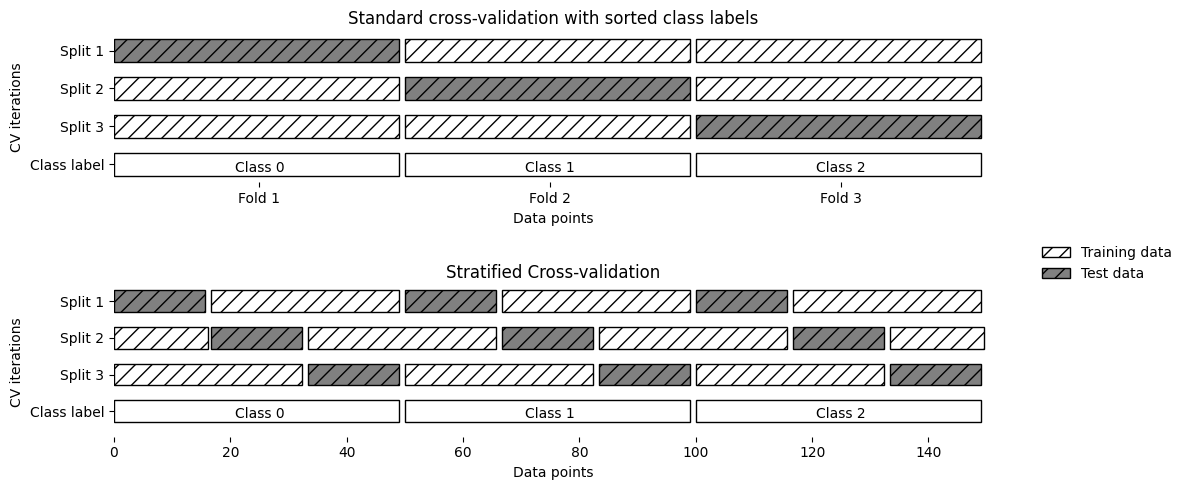

In [30]:
mglearn.plots.plot_stratified_cross_validation()

In [31]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [32]:
print("Значения правильности перекрестной проверки: \n{}".format(cross_val_score(logreg,digits.data,digits.target,cv=kfold)))

Значения правильности перекрестной проверки: 
[0.93055556 0.875      0.94150418 0.93871866 0.89972145]


In [33]:
kfold = KFold(n_splits=3)
print("Значения правильности перекрестной проверки: \n{}".format(cross_val_score(logreg,digits.data,digits.target,cv=kfold)))

Значения правильности перекрестной проверки: 
[0.92821369 0.94156928 0.91652755]


In [35]:
kfold = KFold(n_splits=3,shuffle=True,random_state=0)
print("Значения правильности перекрестной проверки: \n{}".format(cross_val_score(logreg,digits.data,digits.target,cv=kfold)))

Значения правильности перекрестной проверки: 
[0.95659432 0.95993322 0.96828047]


In [42]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg,digits.data,digits.target,cv=loo)
print("Iteration: ",len(scores))
print("Average truth: {:.2f}".format(scores.mean()))

KeyboardInterrupt: 

#### Перекрестная проверка со случайными перестановками при разбиении

In [ ]:
mglearn.plots.plot_shuffle_split()

In [41]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=5,train_size=.5,n_splits=7)
scores = cross_val_score(logreg,digits.data,digits.target,cv=shuffle_split)
print("Значения правильности перекрестной проверки:\n{}".format(scores))

Значения правильности перекрестной проверки:
[0.8 0.8 1.  1.  1.  1.  1. ]


#### Решетчатый поиск

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,random_state=0)
print("Размер обучающего набора: {} размер тестового набора: {}".format(X_train.shape[0],X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score = svm.score(X_test,y_test)
        
        if score > best_score:
            best_score = score 
            best_parameters = {'C': C,'gamma': gamma}
print("Наилучшие значения правильности: {:.2f}".format(best_score))
print("Наилучшие значения параметров: {}".format(best_parameters))

Размер обучающего набора: 1347 размер тестового набора: 450
Наилучшие значения правильности: 1.00
Наилучшие значения параметров: {'C': 1, 'gamma': 0.001}


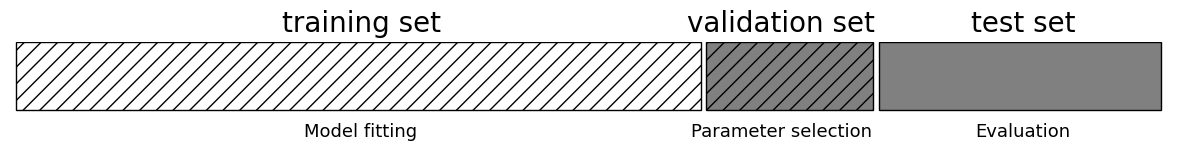

In [45]:
mglearn.plots.plot_threefold_split()

#### Решетчатый поиск с перекрестной проверкой

In [46]:
import numpy as np 
X_trainval, X_test, y_trainval, y_test = train_test_split(digits.data, digits.target, random_state=0) 
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma,C=C)
        scores = cross_val_score(svm,X_trainval,y_trainval,cv=5)
        score = np.mean(scores)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)

SVC(C=1, gamma=0.001)

#### Результаты решетчатого поиска с перекрестной проверкой

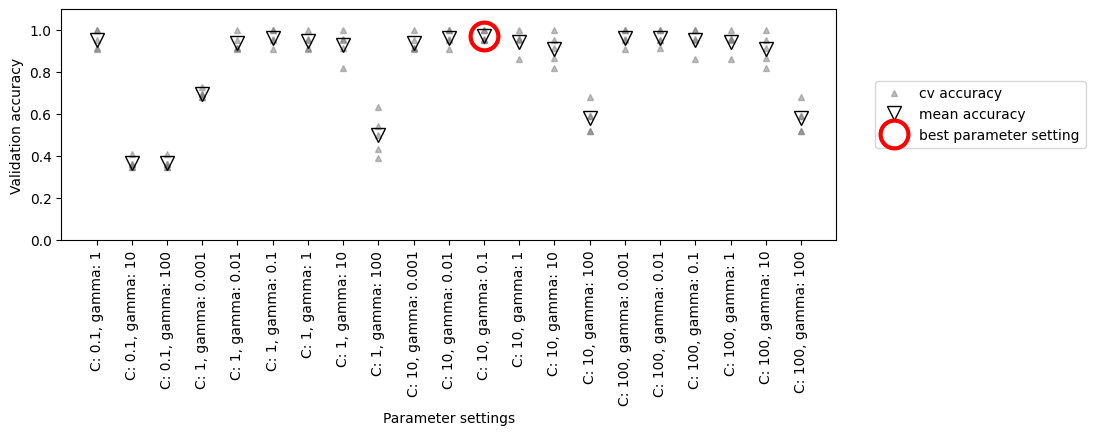

In [47]:
mglearn.plots.plot_cross_val_selection()

#### Метрики качества моделей и их вычисление

In [49]:
y = digits.target == 9
X_train,X_test,y_train,y_test = train_test_split(digits.data,y,random_state=0)

In [50]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Уникальные спрогнозированные метки: {}".format(np.unique(pred_most_frequent)))
print("Правильность на тестовом наборе: {:.2f}".format(dummy_majority.score(X_test,y_test)))

Уникальные спрогнозированные метки: [False]
Правильность на тестовом наборе: 0.90


In [51]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
pred_tree = tree.predict(X_test)
print("Правильность на тестовом наборе: {:.2f}".format(tree.score(X_test,y_test)))

Правильность на тестовом наборе: 0.92


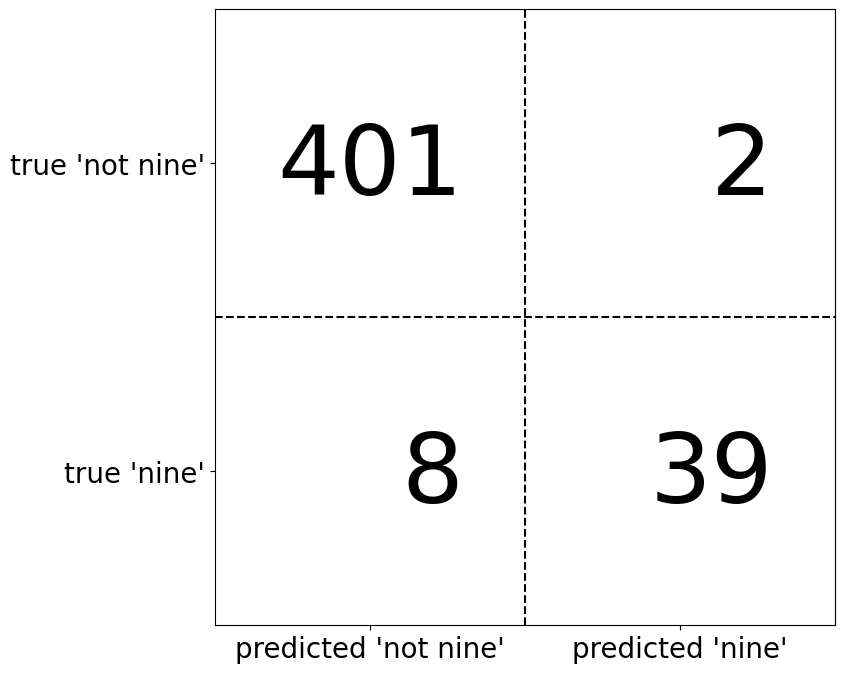

In [54]:
mglearn.plots.plot_confusion_matrix_illustration()

#### Метрики для мультиклассовой классификации

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,random_state=0)
lr = LogisticRegression().fit(X_train,y_train)
pred = lr.predict(X_test)
print("Accuracy : {:.3f}".format(accuracy_score(y_test,pred)))
print("Confusion matrix: \n{}".format(confusion_matrix(y_test,pred)))

Accuracy : 0.951
Confusion matrix: 
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


C:\Users\Notnik_kg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


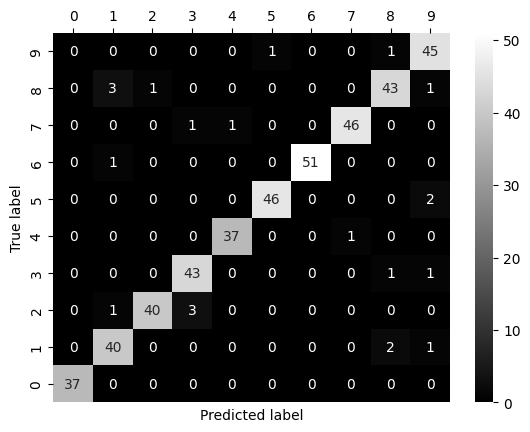

In [57]:
import seaborn as sns 
import matplotlib.pyplot as plt

ax = sns.heatmap(confusion_matrix(y_test,pred),annot=True,xticklabels=digits.target_names,yticklabels=digits.target_names,cmap='gray')
ax.set(xlabel='Predicted label',ylabel='True label')
ax.xaxis.tick_top()
plt.gca().invert_yaxis()
plt.show()

#### Метрики регрессии

In [58]:
print("Метрика качества по умолчанию: {}".format(cross_val_score(SVC(),digits.data,digits.target==9)))
explicit_accuracy = cross_val_score(SVC(),digits.data,digits.target == 9,scoring="accuracy")
print(explicit_accuracy)
roc_auc = cross_val_score(SVC(),digits.data,digits.target == 9,scoring = "roc_auc")
print(roc_auc)

Метрика качества по умолчанию: [0.975      0.99166667 1.         0.99442897 0.98050139]
[0.975      0.99166667 1.         0.99442897 0.98050139]
[0.99717078 0.99854252 1.         0.999828   0.98400413]


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(digits. data, digits. target == 9, random_state=0)

param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 101]}
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print ("Решетчатый поиск с использованием правильности") 
print ("Наилучшие параметры:", grid. best_params_)
print("Наилучшее значение перекр проверки (правильность)): {:.3f}". format(grid.best_score_))
print("AUC на тестовом наборе: {:.3f}". format(roc_auc_score(y_test, grid. decision_function (X_test))))
print("Правильность на тестовом наборе: {:.3f}". format (grid. score(X_test, y_test)))

Решетчатый поиск с использованием правильности
Наилучшие параметры: {'gamma': 0.0001}
Наилучшее значение перекр проверки (правильность)): 0.976
AUC на тестовом наборе: 0.992
Правильность на тестовом наборе: 0.973


#### 3.	Создать модель классификатор, которая по определенному обучаемому набору (salary, city, age, vacation_prefer, transport_prefer) будет определять предпочтения человека (target), в каком городе провести отпуск.

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# a. Создаем датасет
np.random.seed(42)

n_rows = 1000
cities = ['Bishkek', 'London', 'Moscow','OAE','Maldives','New York','Finland']
salaries = [50000,10000,45000,25000]
vacation_preferences = ['Shopping', 'Beach holiday','Swimming Pool','Stay Hotel','Aquarium','Club']
transport_preferences = ['auto', 'plane']

data = {
    'salary': np.random.choice(salaries, n_rows),
    'city': np.random.choice(cities, n_rows),
    'age': np.random.randint(30, 66, n_rows),
    'vacation_prefer': np.random.choice(vacation_preferences, n_rows),
    'transport_prefer': np.random.choice(transport_preferences, n_rows),
    'target': np.random.choice(cities, n_rows)
}

df = pd.DataFrame(data)

print(df.head())


   salary      city  age vacation_prefer transport_prefer    target
0   45000  New York   39   Beach holiday             auto   Bishkek
1   25000   Finland   59            Club             auto    London
2   50000   Bishkek   54            Club             auto  Maldives
3   45000   Bishkek   49      Stay Hotel             auto   Finland
4   45000   Bishkek   34      Stay Hotel             auto    Moscow


In [62]:
df = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer'])

In [67]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
clf = RandomForestClassifier(random_state=42)


In [74]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели:", accuracy)

Точность модели: 0.125


In [72]:
random_data = pd.DataFrame({
    'salary': [50000],
    'age': [45],
    'city_Bishkek': [0],
    'city_London': [0],
    'city_Moscow': [1],
    'vacation_prefer_Shopping': [1],
    'vacation_prefer_Beach holiday': [0],
    'transport_prefer_auto': [1],
    'transport_prefer_plane': [0]
})

for col in X.columns:
    if col not in random_data.columns:
        random_data[col] = 0

# Преобразование категориальных данных в числовые для случайных данных
random_data = random_data[X.columns]


prediction = clf.predict(random_data)
print("Предсказание для случайных данных:", prediction)

Предсказание для случайных данных: ['Maldives']
